## Import
kita gunakan numpy, pandas, sklearn, dan matplotlib

In [619]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

pd.set_option("display.max_columns", 200)

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data
kita gunakan 2 data hasil penggabungan sebelumnya, yaitu app_train dan app_test

In [620]:
app_train = pd.read_csv(r'Application_trains.csv', low_memory=False)
app_test = pd.read_csv(r'Application_tests.csv', low_memory=False)

In [621]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_train,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_train,AMT_ANNUITY_train,AMT_GOODS_PRICE_train,NAME_TYPE_SUITE_train,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_train,HOUR_APPR_PROCESS_START_train,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY_bureau,MONTHS_BALANCE_train,STATUS,SK_ID_PREV,NAME_CONTRACT_TYPEprev_application,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDITprev_application,AMT_DOWN_PAYMENT,AMT_GOODS_PRICEprev_application,WEEKDAY_APPR_PROCESS_STARTprev_application,HOUR_APPR_PROCESS_STARTprev_application,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITEprev_application,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,SK_ID_CURR_credit_card,MONTHS_BALANCEprev_application,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS_credit_card,SK_DPD,SK_DPD_DEF,SK_ID_CURR_instalments,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,SK_ID_CURR_pos_cash,MONTHS_BALANCE_pos_cash,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS_pos_cash,SK_DPD_pos_cash,SK_DPD_DEF_pos_cash
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary

In [622]:
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE_test,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_test,AMT_ANNUITY_test,AMT_GOODS_PRICE_test,NAME_TYPE_SUITE_test,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_test,HOUR_APPR_PROCESS_START_test,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY_bureau,MONTHS_BALANCE_test,STATUS,SK_ID_PREV,NAME_CONTRACT_TYPEprev_application,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDITprev_application,AMT_DOWN_PAYMENT,AMT_GOODS_PRICEprev_application,WEEKDAY_APPR_PROCESS_STARTprev_application,HOUR_APPR_PROCESS_STARTprev_application,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITEprev_application,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,SK_ID_CURR_credit_card,MONTHS_BALANCEprev_application,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS_credit_card,SK_DPD,SK_DPD_DEF,SK_ID_CURR_instalments,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,SK_ID_CURR_pos_cash,MONTHS_BALANCE_pos_cash,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS_pos_cash,SK_DPD_pos_cash,SK_DPD_DEF_pos_cash
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Marri

In [623]:
print(app_train.shape)
print(app_test.shape)

(4173, 212)
(7200, 211)


terdapat 4173 baris data pada `app_train` dan 7200 baris data pada `app_test`. selain itu, terdapat 212 features pada `app_train` (termasuk `TARGET`) dan terdapat 211 features pada `app_test` (tidak termasuk `TARGET`)

selanjutnya kita hapus data yang duplikat (menyisakan data terakhir)

In [624]:
print(app_train['SK_ID_CURR'].nunique())
print(app_test['SK_ID_CURR'].nunique())

3864
3850


terdapat 3864 baris data non duplikat pada `app_train` dan 3850 baris data non duplikat pada `app_test`

In [625]:
app_train = app_train.groupby('SK_ID_CURR').last().reset_index()
app_test = app_test.groupby('SK_ID_CURR').last().reset_index()

In [626]:
print(app_train.shape)
print(app_test.shape)

(3864, 212)
(3850, 211)


# EDA

## cek distribusi kolom target

In [627]:
# cek persentase target dari app_train
app_train['TARGET'].value_counts() / app_train.shape[0] * 100

0    92.158385
1     7.841615
Name: TARGET, dtype: float64

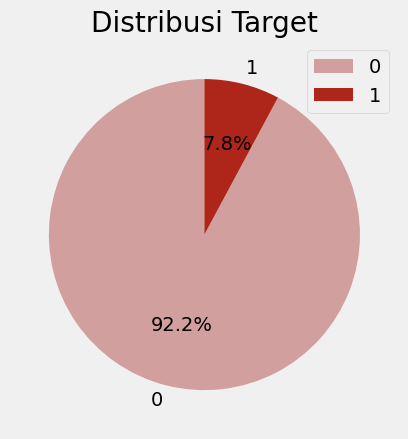

In [685]:
target_counts = app_train['TARGET'].astype(int).value_counts()

colors = ['#D19F9E', '#AE2619']

plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)

plt.title('Distribusi Target'); plt.legend(); plt.show()

Dari informasi di atas dapat dilihat bahwa terdapat data yang `imbalance` karena jauh lebih banyak pinjaman yang dilunasi tepat waktu dibandingkan pinjaman yang tidak dilunasi

## cek missing value

In [629]:
# function untuk cek persentase missing value 
def missing_values_table(df):
    mis_val = df.isnull().sum()

    mis_val_percent = 100 * df.isnull().sum() / len(df)

    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Missing Values', 1: '% of Total Values'})
    
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)
    
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
        "There are " + str(mis_val_table_ren_columns.shape[0]) + 
        " columns that have missing values.")
    
    return mis_val_table_ren_columns

In [630]:
# data train
missing_values = missing_values_table(app_train)
missing_values.head()

Your selected dataframe has 212 columns.
There are 175 columns that have missing values.


,Missing Values,% of Total Values
RATE_INTEREST_PRIVILEGED,3864,100.0
RATE_INTEREST_PRIMARY,3864,100.0
AMT_ANNUITY_bureau,3863,100.0
AMT_CREDIT_MAX_OVERDUE,3863,100.0
AMT_CREDIT_SUM_LIMIT,3862,99.9


In [631]:
# data test
missing_values = missing_values_table(app_test)
missing_values.head()

Your selected dataframe has 211 columns.
There are 204 columns that have missing values.


,Missing Values,% of Total Values
CNT_DRAWINGS_ATM_CURRENT,3848,99.9
RATE_INTEREST_PRIMARY,3848,99.9
RATE_INTEREST_PRIVILEGED,3848,99.9
AMT_DRAWINGS_OTHER_CURRENT,3848,99.9
AMT_DRAWINGS_POS_CURRENT,3848,99.9


kita akan hapus missing value yang persentasenya [di atas 60%](https://dqlab.id/digital-transformation-pahami-teknik-pengolahan-ini-dalam-industri-data) 

### handle missing value

In [632]:
# function untuk menghapus missing value
def drop_col(df, threshold):
    missing_values_info = missing_values_table(df)
    
    columns_to_drop = missing_values_info[
        missing_values_info['% of Total Values'] > threshold].index

    df_cleaned = df.drop(columns=columns_to_drop)

    print("Columns with missing values exceeding {}% have been dropped.".format(threshold))

    return df_cleaned

hapus feature yang persentase missing value [di atas 60%](https://dqlab.id/digital-transformation-pahami-teknik-pengolahan-ini-dalam-industri-data) 

In [633]:
# data train 
app_train_new = drop_col(app_train, 60)
print(app_train_new.shape)

Your selected dataframe has 212 columns.
There are 175 columns that have missing values.
Columns with missing values exceeding 60% have been dropped.
(3864, 105)


In [634]:
missing_values_table(app_train_new).head()

Your selected dataframe has 105 columns.
There are 68 columns that have missing values.


,Missing Values,% of Total Values
LANDAREA_MODE,2264,58.6
LANDAREA_MEDI,2264,58.6
LANDAREA_AVG,2264,58.6
BASEMENTAREA_AVG,2239,57.9
BASEMENTAREA_MODE,2239,57.9


In [635]:
# data test 
app_test_new = drop_col(app_test, 60)
print(app_test_new.shape)

Your selected dataframe has 211 columns.
There are 204 columns that have missing values.
Columns with missing values exceeding 60% have been dropped.
(3850, 104)


In [636]:
missing_values_table(app_test_new).head()

Your selected dataframe has 104 columns.
There are 97 columns that have missing values.


,Missing Values,% of Total Values
LANDAREA_AVG,2239,58.2
LANDAREA_MODE,2239,58.2
LANDAREA_MEDI,2239,58.2
BASEMENTAREA_AVG,2191,56.9
BASEMENTAREA_MEDI,2191,56.9


sekarang jumlah feature yang dipertahankan hanya 105 feature pada `app_train` dan 104 feature pada `app_test`

## cek type data columns

In [637]:
app_train_new.dtypes.value_counts()

float64    69
int64      21
object     15
dtype: int64

cek jumlah unique columns object

In [638]:
app_train_new.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE_train             2
CODE_GENDER                          2
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
NAME_TYPE_SUITE_train                7
NAME_INCOME_TYPE                     5
NAME_EDUCATION_TYPE                  5
NAME_FAMILY_STATUS                   5
NAME_HOUSING_TYPE                    6
OCCUPATION_TYPE                     18
WEEKDAY_APPR_PROCESS_START_train     7
ORGANIZATION_TYPE                   57
HOUSETYPE_MODE                       3
WALLSMATERIAL_MODE                   7
EMERGENCYSTATE_MODE                  2
dtype: int64

cek salah satu feature yang banyak memiliki jumlah unique: ORGANIZATION_TYPE

In [639]:
app_train_new['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    880
XNA                       711
Self-employed             512
Other                     213
Medicine                  135
Business Entity Type 2    124
Government                123
School                     97
Kindergarten               83
Trade: type 7              80
Construction               71
Transport: type 4          62
Business Entity Type 1     60
Industry: type 3           49
Trade: type 3              47
Housing                    44
Industry: type 9           44
Industry: type 11          41
Services                   35
Transport: type 2          34
Postal                     30
Military                   29
Security                   28
Bank                       28
Police                     27
Agriculture                26
Security Ministries        22
Trade: type 2              21
Transport: type 3          18
Restaurant                 16
Industry: type 7           16
Hotel                      15
University                 14
Industry: 

### Align data train dan data test

melakukan align untuk menyamakan jumlah column `app_train` dan `app_test` (selain target)

In [640]:
train_labels = app_train_new['TARGET']

app_train_new, app_test_new = app_train_new.align(app_test_new, join = 'inner', axis = 1)

app_train_new['TARGET'] = train_labels

print('Training Features shape: ', app_train_new.shape)
print('Testing Features shape: ', app_test_new.shape)

Training Features shape:  (3864, 98)
Testing Features shape:  (3850, 97)


## Encoding columns categrorical

label encoding

In [641]:
le = LabelEncoder()
le_count = 0

for col in app_train_new:
    if app_train_new[col].dtype == 'object':
        if len(list(app_train_new[col].unique())) <= 2:
            le.fit(app_train_new[col])
            app_train_new[col] = le.transform(app_train_new[col])
            app_test_new[col] = le.transform(app_test_new[col])

            le_count += 1

print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


one-hot encoding

In [642]:
app_train_new = pd.get_dummies(app_train_new)
app_test_new = pd.get_dummies(app_test_new)

print('Training Features shape: ', app_train_new.shape)
print('Testing Features shape: ', app_test_new.shape)

Training Features shape:  (3864, 197)
Testing Features shape:  (3850, 194)


align kembali

In [643]:
train_labels = app_train_new['TARGET']

app_train_new, app_test_new = app_train_new.align(app_test_new, join = 'inner', axis = 1)

app_train_new['TARGET'] = train_labels

print('Training Features shape: ', app_train_new.shape)
print('Testing Features shape: ', app_test_new.shape)

Training Features shape:  (3864, 193)
Testing Features shape:  (3850, 192)


feature final menjadi 193 pada `app_train` dan 192 pada `app_test`

In [644]:
app_train_new.head()

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security 

In [645]:
app_test_new.head()

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security 

isi kembali missing value dengan median untuk columns numeric dan mode untuk columns categorical

In [646]:
# data train 
# Mengisi missing value dengan median untuk kolom numerik
numeric_columns = app_train_new.select_dtypes(include='number').columns
app_train_new[numeric_columns] = app_train_new[numeric_columns].fillna(app_train_new[numeric_columns].median())

# Mengisi missing value dengan modus untuk kolom kategorikal
categorical_columns = app_train_new.select_dtypes(include='object').columns
app_train_new[categorical_columns] = app_train_new[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))

In [647]:
# data test 
# Mengisi missing value dengan median untuk kolom numerik
numeric_columns = app_test_new.select_dtypes(include='number').columns
app_test_new[numeric_columns] = app_test_new[numeric_columns].fillna(app_test_new[numeric_columns].median())

# Mengisi missing value dengan modus untuk kolom kategorikal
categorical_columns = app_test_new.select_dtypes(include='object').columns
app_test_new[categorical_columns] = app_test_new[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))

In [648]:
app_train_new.head()

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security 

In [649]:
app_test_new.head()

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security 

## Kembali ke EDA

cek anomali feature DAYS_BIRTH

In [650]:
app_train_new['DAYS_BIRTH'].describe()

count     3864.000000
mean    -16048.218427
std       4340.195881
min     -25160.000000
25%     -19620.750000
50%     -15861.000000
75%     -12418.000000
max      -7705.000000
Name: DAYS_BIRTH, dtype: float64

angka pada feature DAYS_BIRTH bernilai negatif, untuk itu kita dapat mengalikannya kembali dengan negatif (-1) dan membagi dengan jumlah hari dalam setahun (365)

In [651]:
(app_train_new['DAYS_BIRTH']/-365).describe()

count    3864.000000
mean       43.967722
std        11.890948
min        21.109589
25%        34.021918
50%        43.454795
75%        53.755479
max        68.931507
Name: DAYS_BIRTH, dtype: float64

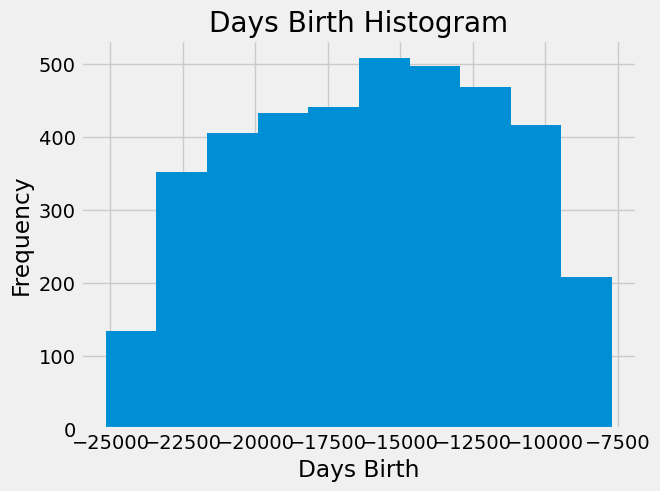

In [686]:
app_train_new['DAYS_BIRTH'].plot.hist(title = 'Days Birth Histogram');
plt.xlabel('Days Birth');

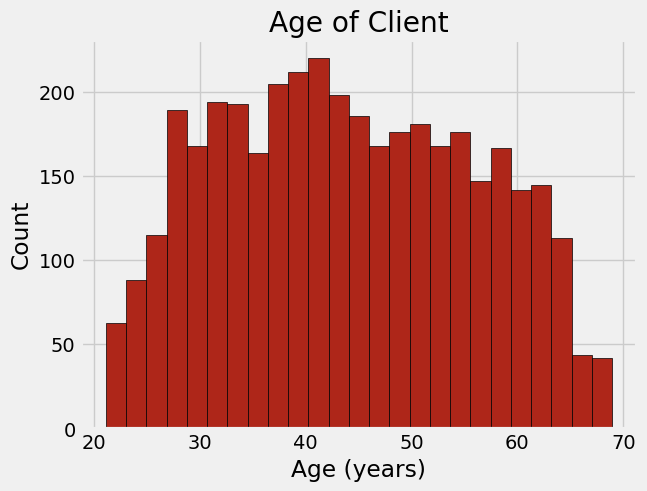

In [689]:
plt.style.use('fivethirtyeight')

plt.hist(app_train_new['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25, color='#AE2619')
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

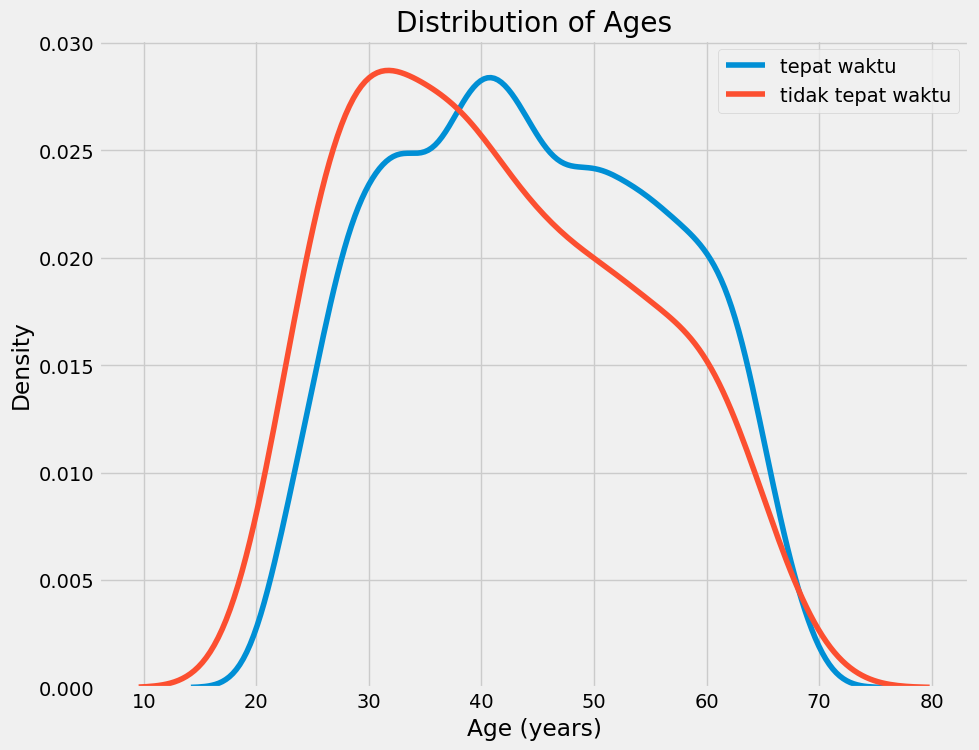

In [694]:
plt.figure(figsize = (10, 8))

sns.kdeplot(app_train_new.loc[app_train_new['TARGET'] == 0, 'DAYS_BIRTH'] / -365, label = 'tepat waktu')

sns.kdeplot(app_train_new.loc[app_train_new['TARGET'] == 1, 'DAYS_BIRTH'] / -365, label = 'tidak tepat waktu')

plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages'); plt.legend()

sudah sesuai, sekarang cek anomali yg lain

cek anomali feature DAYS_EMPLOYED

In [652]:
app_train_new['DAYS_EMPLOYED'].describe()

count      3864.000000
mean      65288.354555
std      142472.444044
min      -15632.000000
25%       -2707.000000
50%       -1201.000000
75%        -281.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

terdapat anomali di mana nilai maximum mencapai 1000 tahun. kita coba kelompokkan nilai-nilai anomali tersebut dan lihat apakah memiliki tingkat gagal bayar lebih tinggi atau rendah dibanding yg bukan anomali

In [653]:
anom = app_train_new[app_train_new['DAYS_EMPLOYED'] == 365243]
non_anom = app_train_new[app_train_new['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.18% of loans
The anomalies default on 6.33% of loans
There are 711 anomalous days of employment


anomali tersebut memiliki tingkat gagal bayar yang lebih rendah. selanjutnya kita akan mengisi nilai anomali tersebut dengan bukan angka (`np.nan`) lalu membuat kolom boolean baru yang menunjukkan apakah nilai tersebut anomali atau tidak

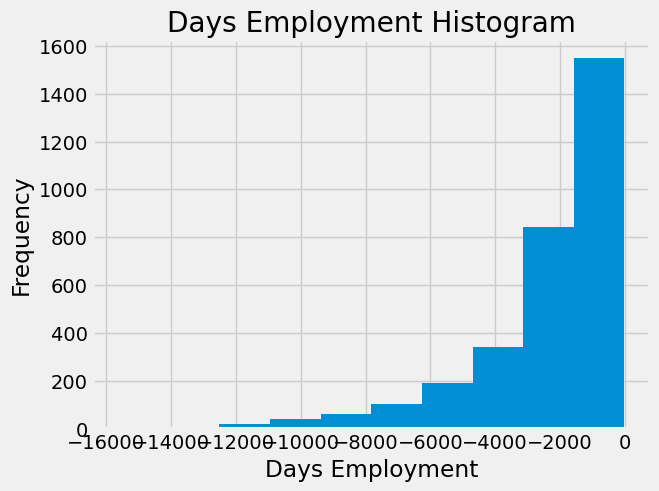

In [654]:
app_train_new['DAYS_EMPLOYED_ANOM'] = app_train_new["DAYS_EMPLOYED"] == 365243

app_train_new['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train_new['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

Distribusinya terlihat lebih sesuai dengan apa yang diharapkan, dan juga telah dibuat kolom baru untuk memberi tahu model bahwa nilai-nilai ini awalnya anomali (karena kami harus mengisi nans dengan beberapa nilai, mungkin median dari kolom). Kolom lain dengan `DAYS` dalam kerangka data terlihat sesuai dengan yang diharapkan tanpa outlier yang jelas.

In [655]:
app_test_new['DAYS_EMPLOYED_ANOM'] = app_test_new["DAYS_EMPLOYED"] == 365243
app_test_new["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test_new["DAYS_EMPLOYED_ANOM"].sum(), len(app_test_new)))

There are 747 anomalies in the test data out of 3850 entries


### cek correlations


* 0.00-0.19 :   “very weak”
* 0.20-0.39 :   “weak”
* 0.40-0.59 :   “moderate”
* 0.60-0.79 :   “strong”
* 0.80-1.0  :   “very strong”


In [656]:
correlations = app_train_new.corr()['TARGET'].sort_values()

print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 DAYS_LAST_PHONE_CHANGE                               0.055191
DAYS_ID_PUBLISH                                      0.057506
NAME_INCOME_TYPE_Working                             0.059448
DAYS_BIRTH                                           0.064671
REGION_RATING_CLIENT                                 0.067810
REGION_RATING_CLIENT_W_CITY                          0.072559
NAME_EDUCATION_TYPE_Secondary / secondary special    0.075657
DAYS_EMPLOYED                                        0.096495
TARGET                                               1.000000
FLAG_MOBIL                                                NaN
FLAG_DOCUMENT_2                                           NaN
FLAG_DOCUMENT_4                                           NaN
FLAG_DOCUMENT_7                                           NaN
FLAG_DOCUMENT_10                                          NaN
FLAG_DOCUMENT_12                                          NaN
Name: TARGET, dtype: float64

Most Negati

korelasi yang lebih signifikan adalah `DAYS_EMPLOYED` adalah korelasi yang paling positif (selain `TARGET`). Melihat dokumentasi, `DAYS_EMPLOYED` adalah berapa hari sebelum lamaran orang tersebut memulai pekerjaan saat ini di hari negatif (apa pun alasannya!). Korelasinya positif, namun nilai fitur ini sebenarnya negatif, artinya seiring lama nasabah bekerja, kecil kemungkinannya untuk gagal bayar (yaitu target == 0). Itu sedikit membingungkan, jadi kita akan mengambil nilai absolut dari fitur tersebut dan korelasinya akan menjadi negatif.
​

### Efek DAYS_EMPLOYED terhadap Repayment

In [657]:
app_train_new['DAYS_EMPLOYED'] = abs(app_train_new['DAYS_EMPLOYED'])
app_train_new['DAYS_EMPLOYED'].corr(app_train_new['TARGET'])

-0.09649495758025359

Seiring lamanya nasabah bekerja, terdapat hubungan linier negatif dengan target yang berarti seiring lamanya nasabah bekerja, mereka cenderung lebih sering membayar kembali pinjamannya tepat waktu.

Mari kita mulai melihat variabel ini. Pertama, kita bisa membuat histogramnya. Kami akan menempatkan sumbu x dalam tahun agar plotnya sedikit lebih mudah dipahami.

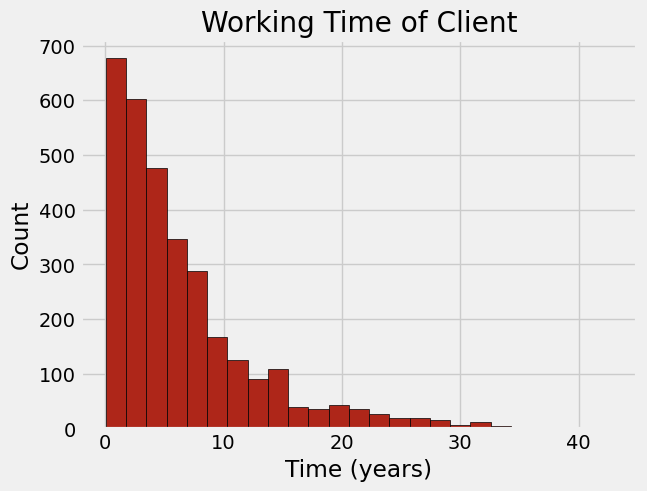

In [691]:
plt.style.use('fivethirtyeight')

plt.hist(app_train_new['DAYS_EMPLOYED'] / 365, edgecolor = 'k', bins = 25, color='#AE2619')
plt.title('Working Time of Client'); plt.xlabel('Time (years)'); plt.ylabel('Count');

distribusi di atas tidak memberi tahu kita banyak hal selain bahwa postivie skew dan tidak ada outlier karena semuanya masuk akal. untuk memvisualisasikan pengaruh lamanya bekerja terhadap target, selanjutnya kita akan membuat KDE plot yang diwarnai dengan nilai target.

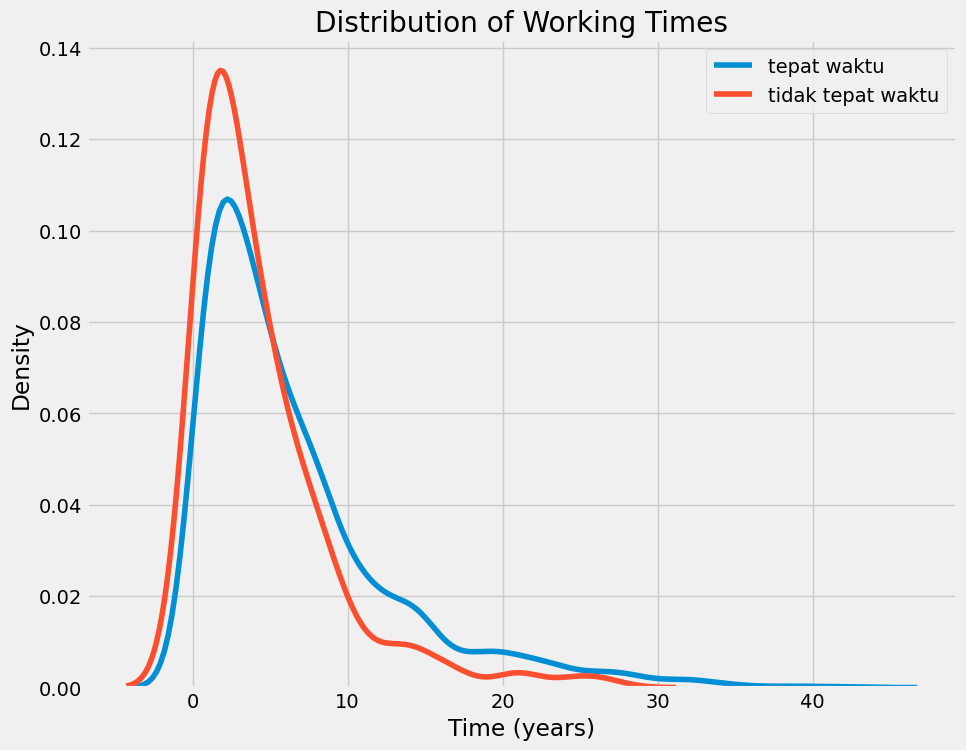

In [695]:
plt.figure(figsize = (10, 8))

sns.kdeplot(app_train_new.loc[app_train_new['TARGET'] == 0, 'DAYS_EMPLOYED'] / 365, label = 'tepat waktu')

sns.kdeplot(app_train_new.loc[app_train_new['TARGET'] == 1, 'DAYS_EMPLOYED'] / 365, label = 'tidak tepat waktu')

plt.xlabel('Time (years)'); plt.ylabel('Density'); plt.title('Distribution of Working Times'); plt.legend()

Kedua kurva target memiliki tren positive skew. Meskipun korelasinya tidak signifikan (koefisien korelasi -0,09), variabel ini kemungkinan besar akan berguna dalam model pembelajaran mesin karena mempengaruhi target. Mari kita lihat hubungan ini dengan cara lain: rata-rata kegagalan membayar kembali pinjaman berdasarkan kelompok lamanya bekerja.

Untuk membuat grafik ini, pertama-tama kita `cut` kategorinya ke dalam bins yang masing-masing berisi 5 tahun. Kemudian, untuk setiap bin, kami menghitung nilai rata-rata target, yang menunjukkan rasio pinjaman yang tidak dilunasi di setiap kategori.

In [660]:
# working time information into a separate dataframe
wt_data = app_train_new[['TARGET', 'DAYS_EMPLOYED']]
wt_data['YEARS_EMPLOYED'] = wt_data['DAYS_EMPLOYED'] / 365

# Bin the working time data
wt_data['YEARS_BINNED'] = pd.cut(wt_data['YEARS_EMPLOYED'], bins = np.linspace(20, 70, num = 11))
wt_data.head()

,TARGET,DAYS_EMPLOYED,YEARS_EMPLOYED,YEARS_BINNED
0,1,637.0,1.745205,NaN
1,0,1188.0,3.254795,NaN
2,0,225.0,0.616438,NaN
3,0,3039.0,8.326027,NaN
4,0,3038.0,8.323288,NaN


In [661]:
# Group by the bin and calculate averages
wt_groups  = wt_data.groupby('YEARS_BINNED').mean()
wt_groups.head()

,TARGET,DAYS_EMPLOYED,YEARS_EMPLOYED
YEARS_BINNED,,,
"(20.0, 25.0]",0.044444,8069.211111,22.107428
"(25.0, 30.0]",0.043478,9921.239130,27.181477
"(30.0, 35.0]",0.000000,11733.500000,32.146575
"(35.0, 40.0]",0.000000,13681.200000,37.482740
"(40.0, 45.0]",0.000000,15290.500000,41.891781


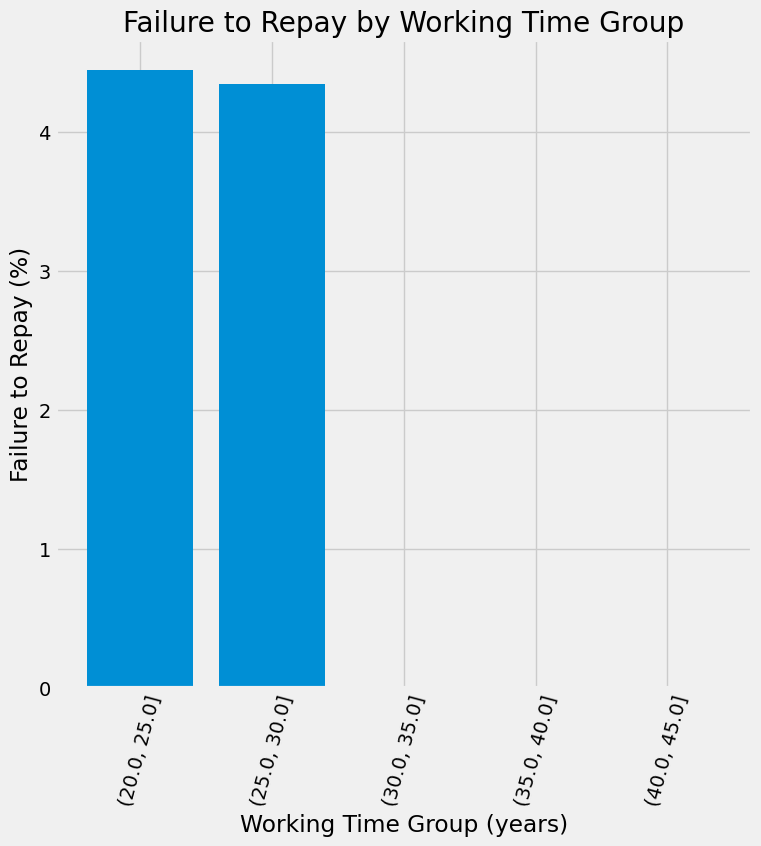

In [662]:
plt.figure(figsize = (8, 8))

# Graph the working time bins and the average of the target as a bar plot
plt.bar(wt_groups.index.astype(str), 100 * wt_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Working Time Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Working Time Group');

Ada tren yang jelas: pemohon yang memiliki waktu bekerja lebih rendah cenderung tidak membayar kembali pinjamannya! Tingkat kegagalan membayar hampir mencapai 5% untuk dua kelompok waktu bekerja terendah dan di 0% untuk kelompok waktu bekerja terlama.

Ini adalah informasi yang dapat langsung digunakan oleh bank: karena nasabah yang waktu bekerjanya lebih sedikit cenderung tidak dapat membayar kembali pinjamannya, mungkin mereka harus diberikan lebih banyak panduan atau tips perencanaan dalam menstabilkan keuangan mereka. Hal ini tidak berarti bank harus melakukan diskriminasi terhadap nasabah tersebut, namun akan lebih bijaksana jika bank mengambil tindakan pencegahan untuk membantu nasabah tersebut membayar tepat waktu.
​

### Exterior source

3 variabel dengan korelasi negatif terkuat dengan target adalah `EXT_SOURCE_1`, `EXT_SOURCE_2`, dan `EXT_SOURCE_3`. Menurut dokumentasi, fitur-fitur ini mewakili "skor yang dinormalisasi dari sumber data eksternal". Saya belum tau apa arti sebenarnya dari hal ini, tetapi ini mungkin merupakan peringkat kredit kumulatif yang dibuat menggunakan berbagai sumber data.

Mari kita lihat variabel-variabel ini.

Pertama, kita dapat menunjukkan korelasi fitur `EXT_SOURCE` dengan target dan satu sama lain.

In [663]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train_new[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_EMPLOYED']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_EMPLOYED
TARGET,1.000000,-0.084038,-0.174044,-0.183936,-0.096495
EXT_SOURCE_1,-0.084038,1.000000,0.132163,0.103308,0.175619
EXT_SOURCE_2,-0.174044,0.132163,1.000000,0.103240,0.092708
EXT_SOURCE_3,-0.183936,0.103308,0.103240,1.000000,0.127717
DAYS_EMPLOYED,-0.096495,0.175619,0.092708,0.127717,1.000000


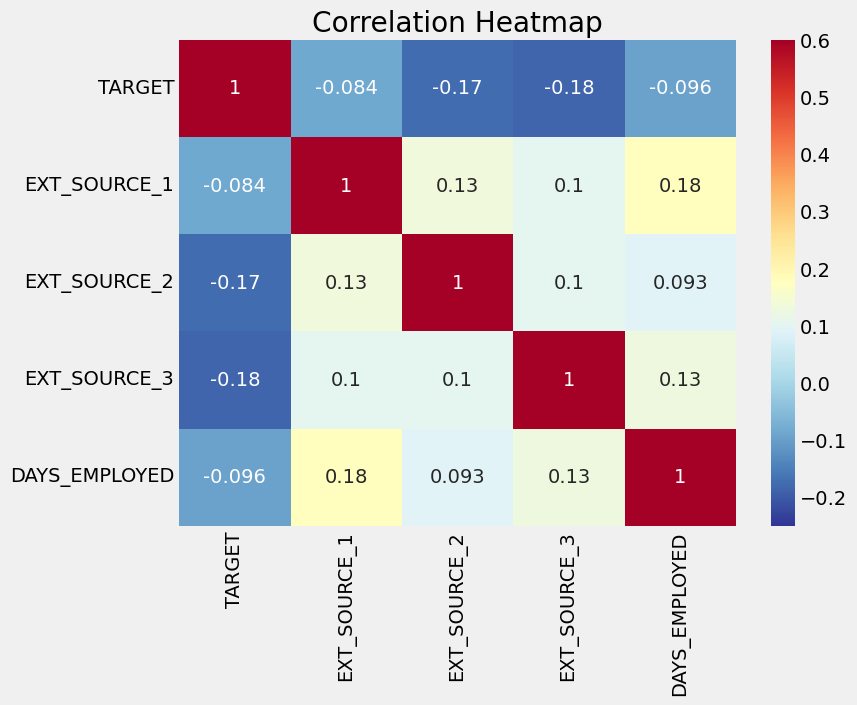

In [664]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

Ketiga fitur `EXT_SOURCE` memiliki korelasi negatif dengan target, yang menunjukkan bahwa seiring dengan peningkatan nilai `EXT_SOURCE`, kemungkinan besar nasabah akan membayar kembali pinjamannya. Kita juga dapat melihat bahwa `DAYS_EMPLOYED` berkorelasi positif dengan `EXT_SOURCE_1`, `EXT_SOURCE_2`, dan `EXT_SOURCE_3` yang menunjukkan bahwa mungkin salah satu faktor dalam skor ini adalah waktu bekerja nasabah.

Selanjutnya kita bisa melihat sebaran masing-masing fitur tersebut diwarnai oleh nilai targetnya. Ini akan memungkinkan kita memvisualisasikan pengaruh variabel ini terhadap target.
​

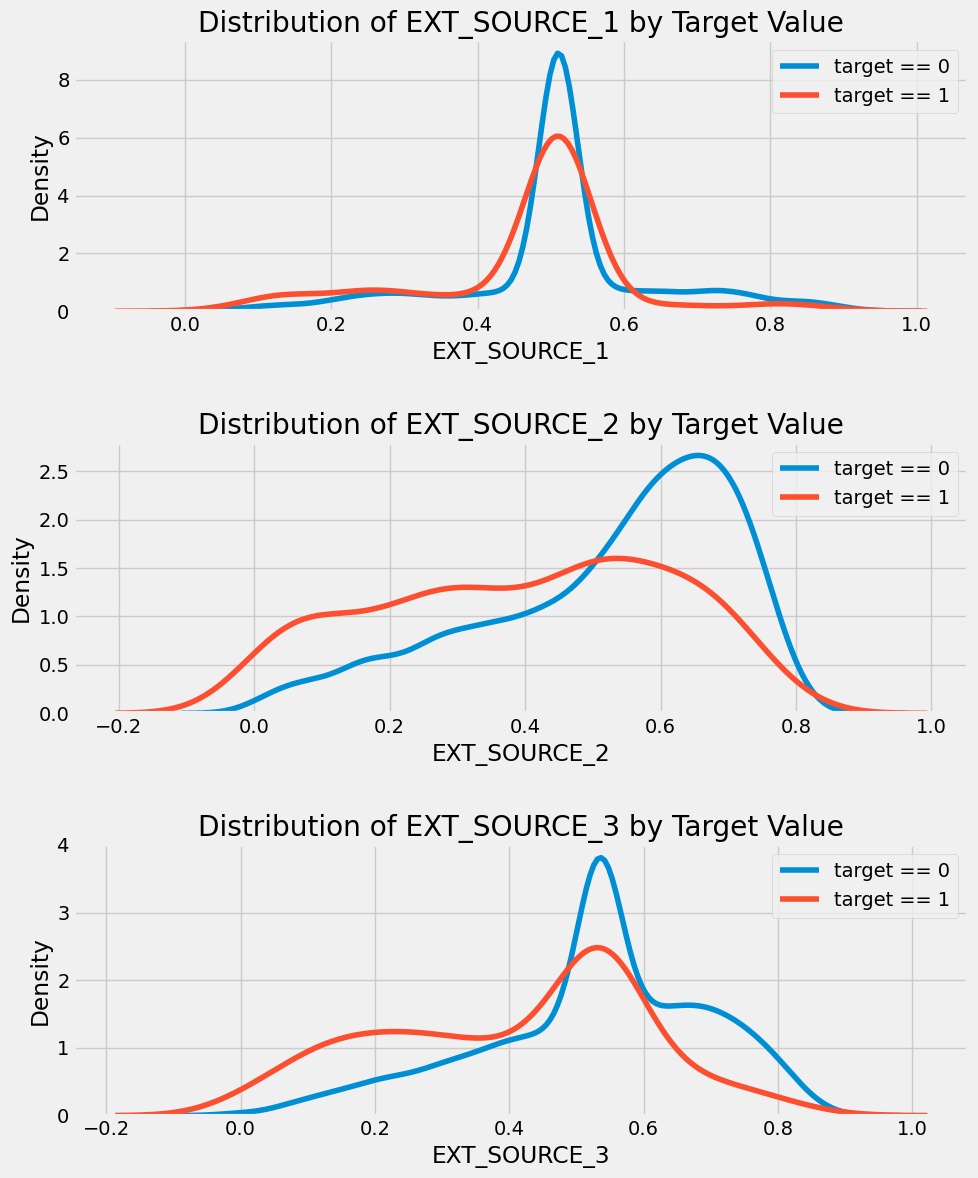

In [665]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):

    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train_new.loc[app_train_new['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train_new.loc[app_train_new['TARGET'] == 1, source], label = 'target == 1')

    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density'); plt.legend()

plt.tight_layout(h_pad = 2.5)


`EXT_SOURCE_2` menampilkan perbedaan terbesar antara nilai target. Kita dapat melihat dengan jelas bahwa fitur ini ada hubungannya dengan kemungkinan pemohon membayar kembali pinjamannya. Hubungannya tidak terlalu kuat, namun variabel-variabel ini akan tetap berguna bagi model pembelajaran mesin untuk memprediksi apakah pemohon akan membayar kembali pinjamannya tepat waktu atau tidak.

# Feature Engineering

## Domain knowladge features

Di sini akan dibuat fitur baru yang terinspirasi dari Aguiar:

* `DAYS_EMPLOYED_PERCENT`: persentase hari kerja relatif terhadap usia klien

In [666]:
# cek columns pada dataset
for col in sorted(app_train_new.columns):
    print(col)

AMT_INCOME_TOTAL
AMT_REQ_CREDIT_BUREAU_DAY
AMT_REQ_CREDIT_BUREAU_HOUR
AMT_REQ_CREDIT_BUREAU_MON
AMT_REQ_CREDIT_BUREAU_QRT
AMT_REQ_CREDIT_BUREAU_WEEK
AMT_REQ_CREDIT_BUREAU_YEAR
APARTMENTS_AVG
APARTMENTS_MEDI
APARTMENTS_MODE
BASEMENTAREA_AVG
BASEMENTAREA_MEDI
BASEMENTAREA_MODE
CNT_CHILDREN
CNT_FAM_MEMBERS
CODE_GENDER
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_EMPLOYED_ANOM
DAYS_ID_PUBLISH
DAYS_LAST_PHONE_CHANGE
DAYS_REGISTRATION
DEF_30_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE
ELEVATORS_AVG
ELEVATORS_MEDI
ELEVATORS_MODE
EMERGENCYSTATE_MODE_No
EMERGENCYSTATE_MODE_Yes
ENTRANCES_AVG
ENTRANCES_MEDI
ENTRANCES_MODE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
FLAG_CONT_MOBILE
FLAG_DOCUMENT_10
FLAG_DOCUMENT_11
FLAG_DOCUMENT_12
FLAG_DOCUMENT_13
FLAG_DOCUMENT_14
FLAG_DOCUMENT_15
FLAG_DOCUMENT_16
FLAG_DOCUMENT_17
FLAG_DOCUMENT_18
FLAG_DOCUMENT_19
FLAG_DOCUMENT_2
FLAG_DOCUMENT_20
FLAG_DOCUMENT_21
FLAG_DOCUMENT_3
FLAG_DOCUMENT_4
FLAG_DOCUMENT_5
FLAG_DOCUMENT_6
FLAG_DOCUMENT_7
FLAG_DOCUMENT_8
FLAG_DOCUMENT_9
FLAG_EMAI

In [667]:
app_train_domain = app_train_new.copy()
app_test_domain = app_test_new.copy()

app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

#### Visualisasi Variabel Baru

kita harus menjelajahi variabel __domain knowledge__ ini secara visual. untuk itu, kita akan membuat KDE plot yang sama yang diwarnai dengan nilai `TARGET`.

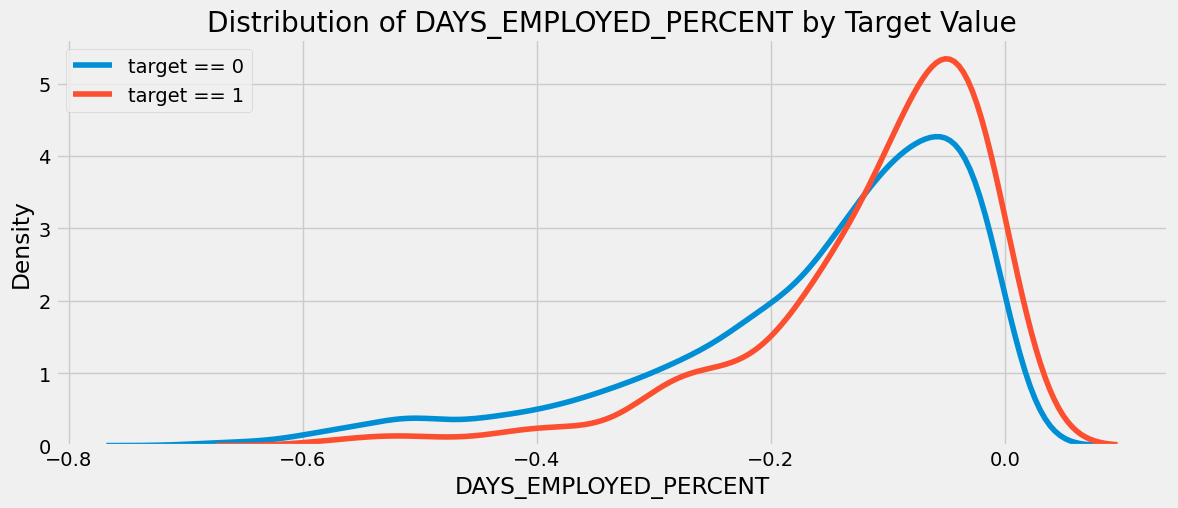

In [668]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['DAYS_EMPLOYED_PERCENT']):

    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')

    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density'); plt.legend()

plt.tight_layout(h_pad = 2.5)

Sulit untuk dikatakan apakah fitur baru ini akan berguna. Satu-satunya cara untuk memastikannya adalah dengan mencobanya

# Baseline
kita gunakan model Logistic Regression

## Implementasi Model

In [669]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

train = app_train_new.drop(columns=['TARGET'])
label = app_train_new['TARGET']

x_train, x_test, y_train, y_test = train_test_split(train, label, test_size=0.25)

# Feature names
features = list(train.columns)

# Copy of the testing data
test = app_test_new.copy()

# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(x_train)

# Transform both training and testing data
x_train = imputer.transform(x_train)
x_test = imputer.transform(x_test)

# Repeat with the scaler
scaler.fit(x_train)
train = scaler.transform(x_train)
test = scaler.transform(x_test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (2898, 193)
Testing data shape:  (966, 193)


## Model Logistic Regression
di sini akan lebih difokuskan dalam penerapan model Logistic Regression

untuk model yang pertama kita gunakan `LogisticRegression`. perubahan yang akan dilakukan dari pengaturan model default adalah menurunkan regularization parameter, C, yang mengontrol jumlah overfitting. Ini akan memberi kita hasil yang sedikit lebih baik daripada `LogisticRegression` default.

pertama-tama kita membuat model, kemudian kita latih model menggunakan `.fit` dan kemudian kita membuat prediksi pada data pengujian menggunakan `.predict_proba`.

In [670]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(train, y_train)

LogisticRegression(C=0.0001)

Setelah model dilatih, model tersebut dapat digunakan untuk membuat prediksi. Kami ingin memprediksi kemungkinan tidak membayar pinjaman, jadi kami menggunakan metode model `predict.proba`. Kolom pertama adalah probabilitas target 0 dan kolom kedua adalah probabilitas target 1. Kami ingin kemungkinan pinjaman tidak dilunasi, jadi kami akan memilih kolom kedua.

In [671]:
from sklearn.metrics import roc_auc_score

log_reg_pred = log_reg.predict_proba(test)[:, 1]

print(roc_auc_score(y_test, log_reg_pred))

0.6673596673596673


dari model Logistic Regression diperoleh nilai ROC-AUC sekitar 0.67

## Improved Model: Random Forest
kita coba tingkatkan dengan menggunakan model lain, yaitu Random Forest

In [672]:
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 200, random_state = 50, verbose = 1, n_jobs = -1)

In [673]:
# Train on the training data
random_forest.fit(train, y_train)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions = random_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.2s


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


In [674]:
print(roc_auc_score(y_test, predictions))

0.6890231577731577


dari model Random Forest diperoleh peningkatan nilai ROC-AUC, yaitu menjadi sebesar 0.69

### Membuat Prediksi menggunakan Feature Engineer

Selanjutnya untuk melihat apakah Domain Knowledge meningkatkan model adalah dengan melatih model untuk menguji feature ini. Kami kemudian dapat membandingkan performa model tanpa feature ini untuk mengukur pengaruh feature engineering.
​

In [675]:
train_domain = app_train_domain.drop(columns=['TARGET'])
label_domain = app_train_domain['TARGET']

x_train_domain, x_test_domain, y_train_domain, y_test_domain = train_test_split(train_domain, label_domain, test_size=0.25)

# Feature names
features = list(train_domain.columns)

# Copy of the testing data
test_domain = app_test_domain.copy()

# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(x_train_domain)

# Transform both training and testing data
x_train_domain = imputer.transform(x_train_domain)
x_test_domain = imputer.transform(x_test_domain)

# Repeat with the scaler
scaler.fit(x_train_domain)
train_domain = scaler.transform(x_train_domain)
test_domain = scaler.transform(x_test_domain)

print('Training data shape: ', train_domain.shape)
print('Testing data shape: ', test_domain.shape)

Training data shape:  (2898, 194)
Testing data shape:  (966, 194)


In [676]:
print(roc_auc_score(y_test_domain, predictions))

0.517779799029799


Domain Knowledge justru menurunkan nilai ROC-AUC pada model, kita kembali menggunakan model sebelumnya untuk menginterpretasikan model dengan Feature Importances

## Interpretasi Model : Feature Importances

In [696]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better.

    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance

    Returns:
        shows a plot of the 15 most importance features

        df (dataframe): feature importances sorted by importance (highest to lowest)
        with a column for normalized importance
        """

    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()

    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()

    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))),
            df['importance_normalized'].head(15),
            align = 'center', edgecolor = 'k', color='#AE2619')

    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))

    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()

    return df

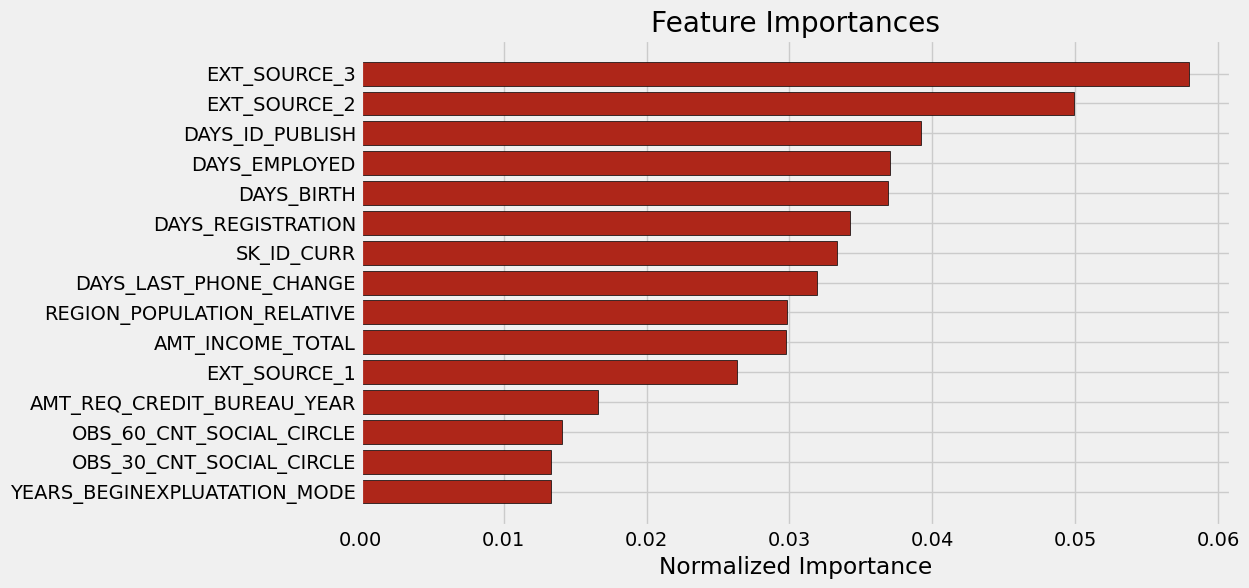

In [697]:
feature_importances_sorted = plot_feature_importances(feature_importances)

Sesuai yang diharapkan, feature yang paling penting adalah feature yang berhubungan dengan `EXT_SOURCE` dan `DAYS_EMPLOYED`. Kami melihat bahwa hanya sedikit feature yang sangat penting bagi model, nantinya feature yang kurang penting mungkin dapat menghilangkan  tanpa penurunan performa. feature-feature ini memungkinkan kita mulai memahami faktor apa saja yang dipertimbangkan model kita saat membuat prediksi.